<a href="https://colab.research.google.com/github/josh-shah/josh-shah.github.io/blob/main/FPL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# scipy
import scipy as sp

# scikit-learn
import sklearn as sk

# import other important functions and algorithms
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

In [20]:
# Get 2022 to 2023 data 
url_2023 = 'https://fantasy.premierleague.com/api/bootstrap-static/'
req = requests.get(url_2023)
json = req.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [21]:
df_elements = pd.DataFrame(json['elements'])
df_elements_types = pd.DataFrame(json['element_types'])
df_teams = pd.DataFrame(json['teams'])

In [22]:
df_elements.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [23]:
pd.set_option('mode.chained_assignment', None) # ignore warning
df_key_stats_2022 = df_elements[['team','first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'element_type']]
df_key_stats_2022['position'] = df_key_stats_2022.element_type.map(df_elements_types.set_index('id').singular_name) # position of player
df_key_stats_2022['team'] = df_key_stats_2022.team.map(df_teams.set_index('id').name) # team of player
df_key_stats_2022['now_cost'] = df_key_stats_2022['now_cost'].map(lambda x: x/10) # cost of player
df_key_stats_2022['value'] = df_key_stats_2022.apply(lambda row: round(row.total_points/row.now_cost,2), axis = 1) # total points/cost of player
def change_name(x):
    if(x == "Midfielder"):
        return "MID"
    elif(x == "Forward"):
        return "FWD"
    elif(x == "Goalkeeper"):
        return "GK"
    else:
        return "DEF"
        
df_key_stats_2022["position"] = [change_name(x) for x in df_key_stats_2022["position"]]
df_key_stats_2022

,team,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,position,value
0,Arsenal,Cédric,Alves Soares,0,0,2,28,0,1.6,2.4,...,5,0.4,0,0,0,0.1,4.2,2,DEF,0.48
1,Arsenal,Granit,Xhaka,3,4,71,1436,14,361.2,346.6,...,294,99.4,7,0,3,3.3,5.1,3,MID,13.92
2,Arsenal,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,...,27,1.1,0,0,0,0.8,4.2,3,MID,1.43
3,Arsenal,Rob,Holding,0,0,5,15,0,0.1,3.4,...,17,0.3,0,0,0,0.1,4.2,2,DEF,1.19
4,Arsenal,Thomas,Partey,2,0,48,1212,8,186.3,257.8,...,224,59.3,8,0,2,0.5,4.8,3,MID,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,Wolves,Boubacar,Traoré,0,1,12,380,7,16.6,48.0,...,38,7.2,0,0,2,0.1,4.4,3,MID,2.73
683,Wolves,Nathan,Fraser,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0,0.1,4.5,4,FWD,0.00
684,Wolves,Harvey,Griffiths,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,4.5,3,MID,0.00
685,Wolves,Dexter,Lembikisa,0,0,1,22,1,0.8,1.4,...,3,0.2,0,0,0,0.0,4.0,2,DEF,0.25


In [24]:
df_key_stats_2022 = df_key_stats_2022[['position', 'first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost']]
df_key_stats_2022

,position,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,DEF,Cédric,Alves Soares,0,0,2,28,0,1.6,2.4,0.0,0,5,0.4,0,0,0,0.1,4.2
1,MID,Granit,Xhaka,3,4,71,1436,14,361.2,346.6,286.0,7,294,99.4,7,0,3,3.3,5.1
2,MID,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,0.0,0,27,1.1,0,0,0,0.8,4.2
3,DEF,Rob,Holding,0,0,5,15,0,0.1,3.4,0.0,0,17,0.3,0,0,0,0.1,4.2
4,MID,Thomas,Partey,2,0,48,1212,8,186.3,257.8,148.0,4,224,59.3,8,0,2,0.5,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,MID,Boubacar,Traoré,0,1,12,380,7,16.6,48.0,7.0,0,38,7.2,0,0,2,0.1,4.4
683,FWD,Nathan,Fraser,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,4.5
684,MID,Harvey,Griffiths,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.5
685,DEF,Dexter,Lembikisa,0,0,1,22,1,0.8,1.4,0.0,0,3,0.2,0,0,0,0.0,4.0


In [25]:
df_key_stats_2022.sort_values('minutes', inplace=True, ascending=True) # sort on minutes
df_key_stats_2022 = df_key_stats_2022.reset_index(drop=True)
df_key_stats_2022

,position,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,GK,Alex,Smithies,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,4.0
1,DEF,Sepp,van den Berg,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,4.0
2,MID,Taylor,Richards,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.5
3,DEF,Haydon,Roberts,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.0
4,DEF,Ben,Davies,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,GK,Danny,Ward,0,0,66,1620,31,0.0,430.4,0.0,9,344,43.0,6,0,0,31.0,4.1
683,GK,José,Malheiro de Sá,0,0,70,1620,27,0.0,443.8,0.0,6,347,44.3,4,0,0,5.0,5.0
684,DEF,Max,Kilman,0,0,45,1620,27,14.5,341.8,55.0,4,279,41.3,4,0,2,1.7,4.4
685,MID,James,Ward-Prowse,3,2,58,1620,33,588.1,374.6,128.0,6,317,109.1,1,0,2,4.5,6.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06c2d33490>]],
      dtype=object)

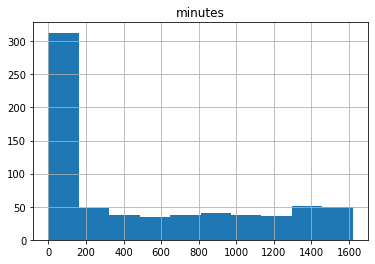

In [26]:
df_key_stats_2022[["minutes"]].hist()

In [27]:
# remove players who have less than 300 minutes of playing time, CHANGE TO 500 by the end of the season
count = 0
for index, row in df_key_stats_2022.iterrows():
    if(row["minutes"] < 300):
        count += 1
        continue
    else:
        break
print(count)
df_key_stats_2022 = df_key_stats_2022[358:]
df_key_stats_2022 = df_key_stats_2022.reset_index(drop=True)

358


In [28]:
dataTypeDict = dict(df_key_stats_2022.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'total_points': dtype('int64'), 'minutes': dtype('int64'), 'goals_conceded': dtype('int64'), 'creativity': dtype('O'), 'influence': dtype('O'), 'threat': dtype('O'), 'bonus': dtype('int64'), 'bps': dtype('int64'), 'ict_index': dtype('O'), 'clean_sheets': dtype('int64'), 'red_cards': dtype('int64'), 'yellow_cards': dtype('int64'), 'selected_by_percent': dtype('O'), 'now_cost': dtype('float64')}


In [29]:
df_key_stats_2022[["influence","creativity","threat"]] = df_key_stats_2022[["influence","creativity","threat"]].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [30]:
df_key_stats_2022
dataTypeDict = dict(df_key_stats_2022.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'total_points': dtype('int64'), 'minutes': dtype('int64'), 'goals_conceded': dtype('int64'), 'creativity': dtype('float64'), 'influence': dtype('float64'), 'threat': dtype('float64'), 'bonus': dtype('int64'), 'bps': dtype('int64'), 'ict_index': dtype('O'), 'clean_sheets': dtype('int64'), 'red_cards': dtype('int64'), 'yellow_cards': dtype('int64'), 'selected_by_percent': dtype('O'), 'now_cost': dtype('float64')}


Text(0, 0.5, 'count')

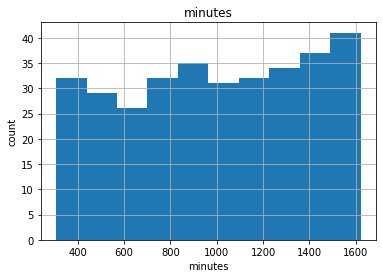

In [31]:
df_key_stats_2022[["minutes"]].hist()
plt.xlabel("minutes")
plt.ylabel("count")

In [32]:
df_key_stats_2022.isnull().values.any()

False

In [ ]:
#save as csv
df_key_stats_2022.to_csv('FPL_API.csv')